In [1]:
import os


if "original_dir" in globals():
    # current_dir = os.path.dirname(original_dir)
    current_dir = original_dir
    os.chdir(current_dir)
    print(f"Current directory: {current_dir}")
else:
    original_dir = os.getcwd()
    print(f"Current directory: {original_dir}")

os.chdir("../../../../")
print(f"Changed directory: {os.getcwd()}")


Current directory: d:\northeastern\neu_dev\myo_assist_dev\myosuite\rl_train\myoassist\analyzer
Changed directory: d:\northeastern\neu_dev\myo_assist_dev


In [2]:
from myoassist_rl.rl_train.analyzer.gait_evaluate import GaitEvaluatorReflex
gait_evaluator = GaitEvaluatorReflex('Full_Dephy_5pt')
gait_evaluator.initialize_env()

MyoSuite:> Registering Myo Envs
Loaded parameters from: myorfl_Kine_2D_1_25_2025Mar05_0942_None_Best.txt
Parameter vector size: 86
    MyoSuite: A contact-rich simulation suite for musculoskeletal motor control
        Vittorio Caggiano, Huawei Wang, Guillaume Durandau, Massimo Sartori, Vikash Kumar
        L4DC-2019 | https://sites.google.com/view/myosuite
    


d:\northeastern\neu_dev\myo_assist_dev\.venv\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.seed to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.seed` for environment variables or `env.get_wrapper_attr('seed')` that will search the reminding wrappers.
  logger.warn(
d:\northeastern\neu_dev\myo_assist_dev\.venv\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.sim to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.sim` for environment variables or `env.get_wrapper_attr('sim')` that will search the reminding wrappers.
  logger.warn(
d:\northeastern\neu_dev\myo_assist_dev\.venv\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.dt to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.dt` for environment variables or `env.


Parameter Validation:
Pose check: True
Right controller check: (True, 'Valid spline parameters')
Left controller check: (True, 'Valid spline parameters')

Environment initialized and ready for simulation


In [3]:
gait_data_path = gait_evaluator.evaluate(os.path.join("Full_Dephy_5pt", "analyze_result"), "Full_Dephy_5pt_Best.json")

type(mj_data)=<class 'dm_control.mujoco.wrapper.core.MjData'>, type(mj_model)=<class 'dm_control.mujoco.wrapper.core.MjModel'>
=====================Start of GaitData==================
=====================Start of Series Data==================
j_key='pelvis_tx',property_key='qpos',len(current_data)=500,np.min(current_data)=np.float64(0.014140301685416242),np.max(current_data)=np.float64(7.20188465992065)
j_key='pelvis_tx',property_key='qvel',len(current_data)=500,np.min(current_data)=np.float64(0.8871846723162781),np.max(current_data)=np.float64(2.337038500909779)
j_key='pelvis_ty',property_key='qpos',len(current_data)=500,np.min(current_data)=np.float64(0.8992400853841401),np.max(current_data)=np.float64(0.9412937193196188)
j_key='pelvis_ty',property_key='qvel',len(current_data)=500,np.min(current_data)=np.float64(-0.2351588719705578),np.max(current_data)=np.float64(0.48712213005961613)
j_key='pelvis_tilt',property_key='qpos',len(current_data)=500,np.min(current_data)=np.float64(-0.35

In [4]:
gait_data_path

'train_logs\\reflex\\Full_Dephy_5pt\\analyze_result\\Full_Dephy_5pt_Best.json'

In [5]:
analyze_result_dir = os.path.join("train_logs","reflex","Full_Dephy_5pt", "analyze_result")

In [6]:
from myoassist_rl.rl_train.analyzer.gait_analyze import GaitAnalyzer
from myoassist_rl.rl_train.analyzer.gait_evaluate import GaitData


gait_data = GaitData()
gait_data.read_json_data(gait_data_path)
import json 
with open(os.path.join("myosuite/simhive/myoassist_sim/reference_data_segmented/02-constspeed_reduced_humanoid_segmented.json"), 'r') as f:
    segmented_ref_data = json.load(f)
gait_analyzer = GaitAnalyzer(gait_data, segmented_ref_data)

self.gait_data.series_data.keys()=dict_keys(['joint_data', 'actuator_data', 'sensor_data', 'physics_data'])


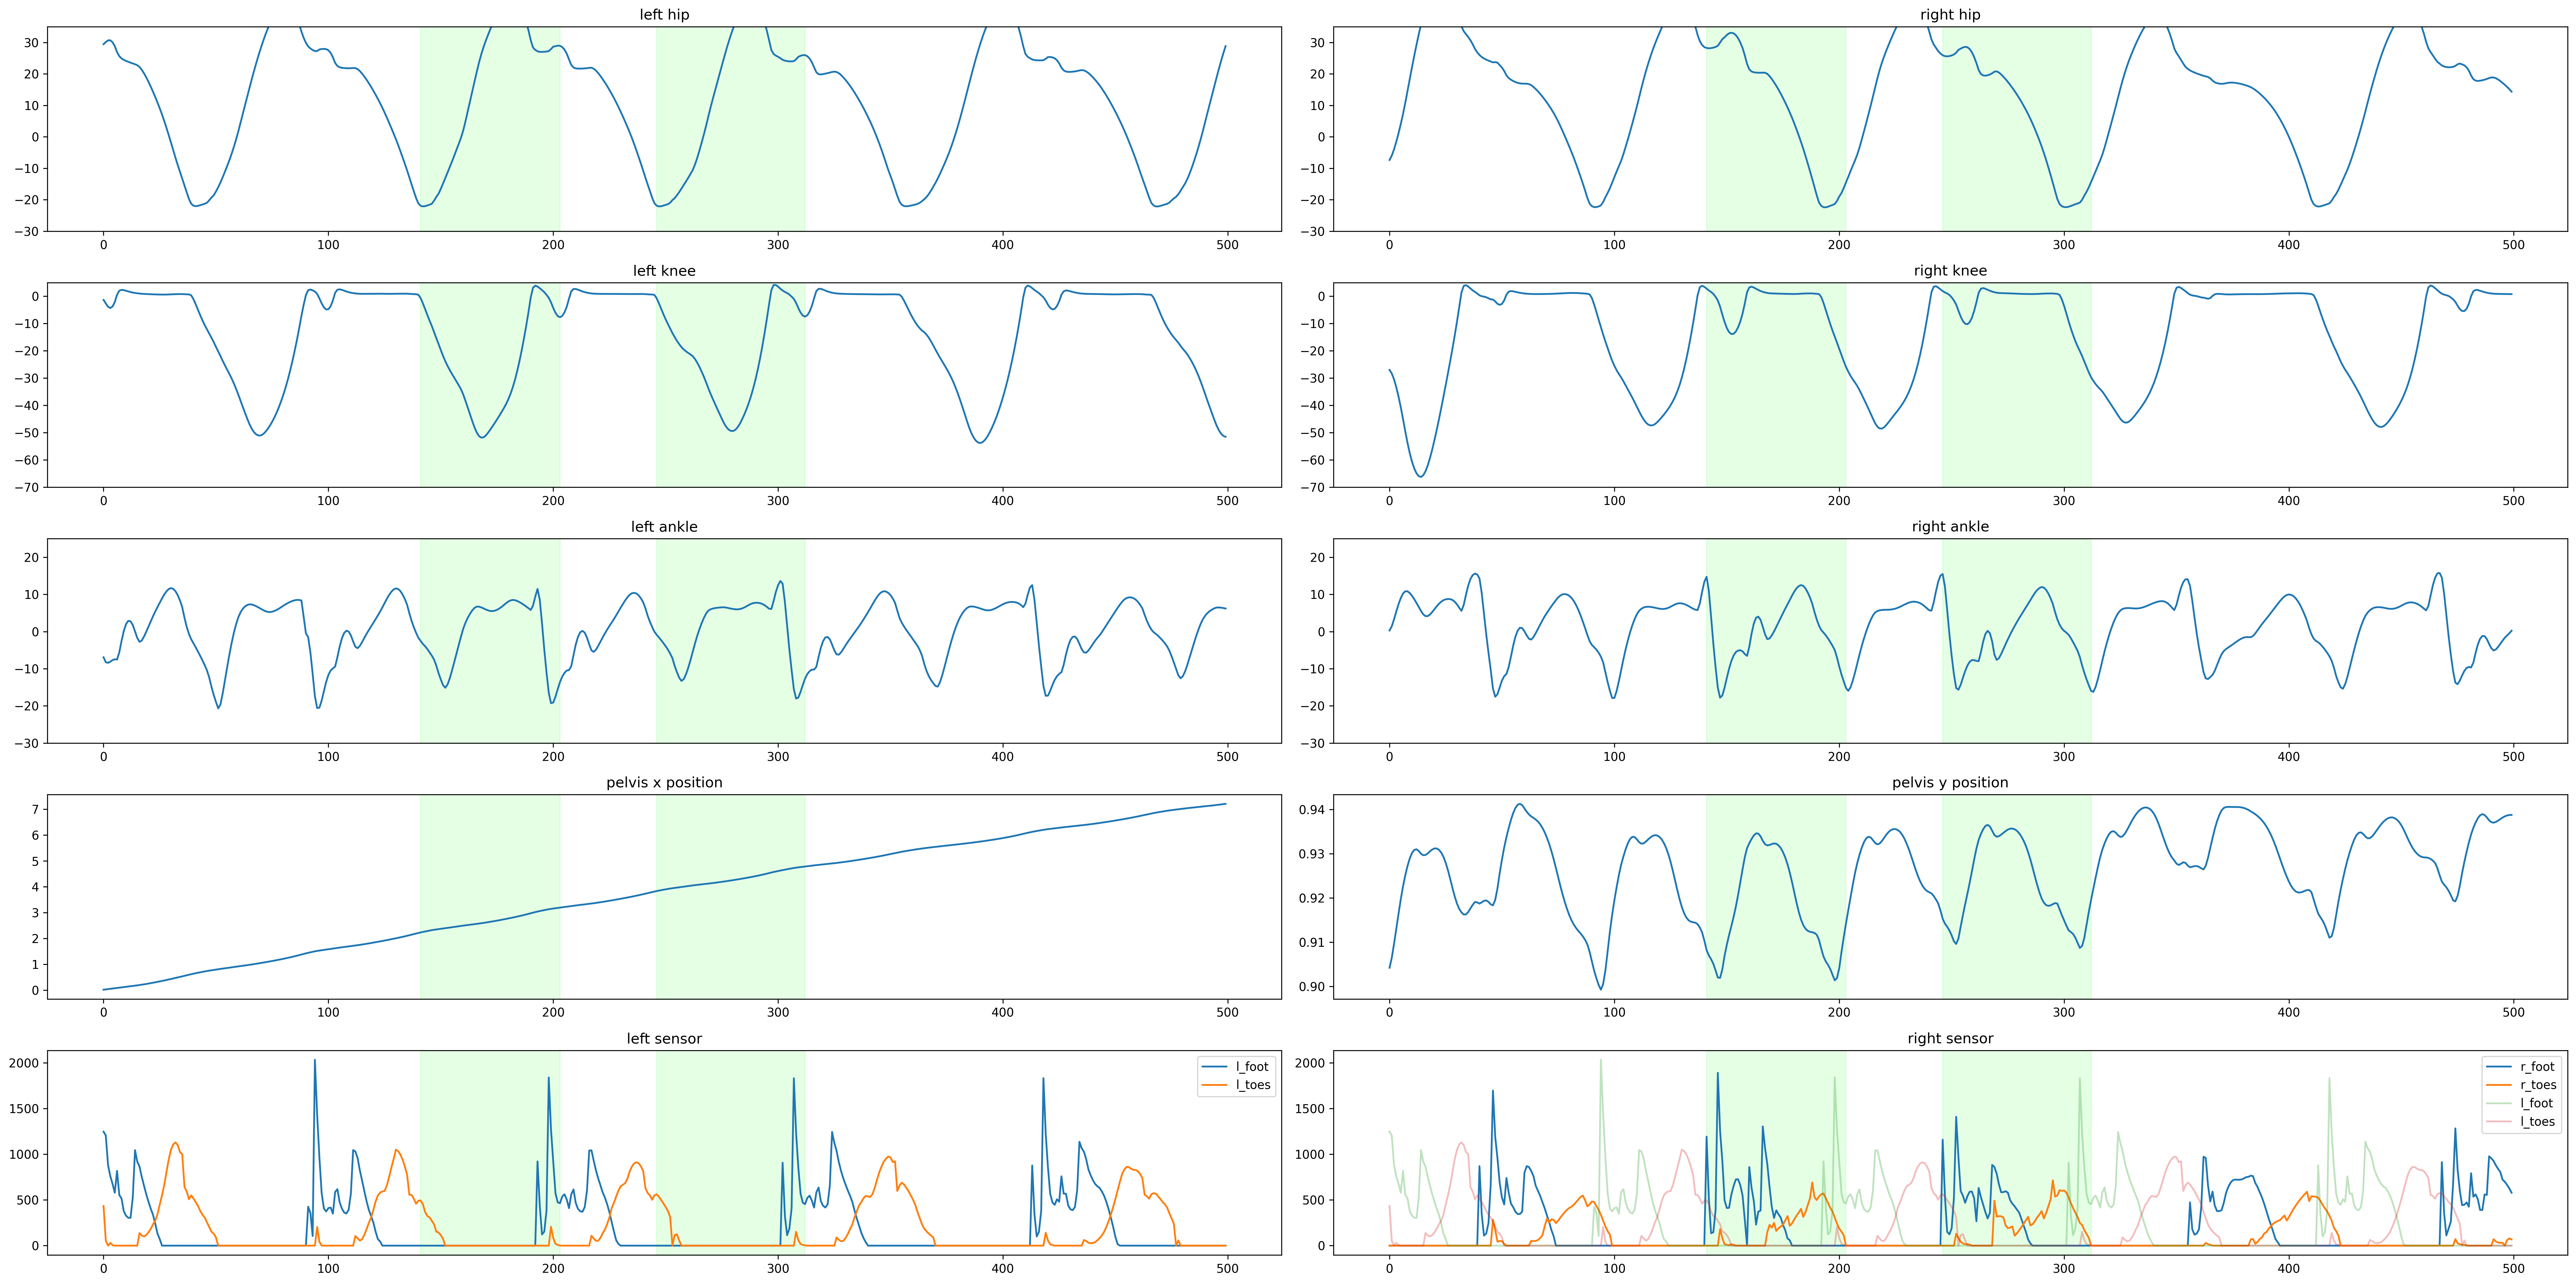

In [7]:
gait_analyzer.plot_entire_result(result_dir=analyze_result_dir,is_right_foot_based=True)

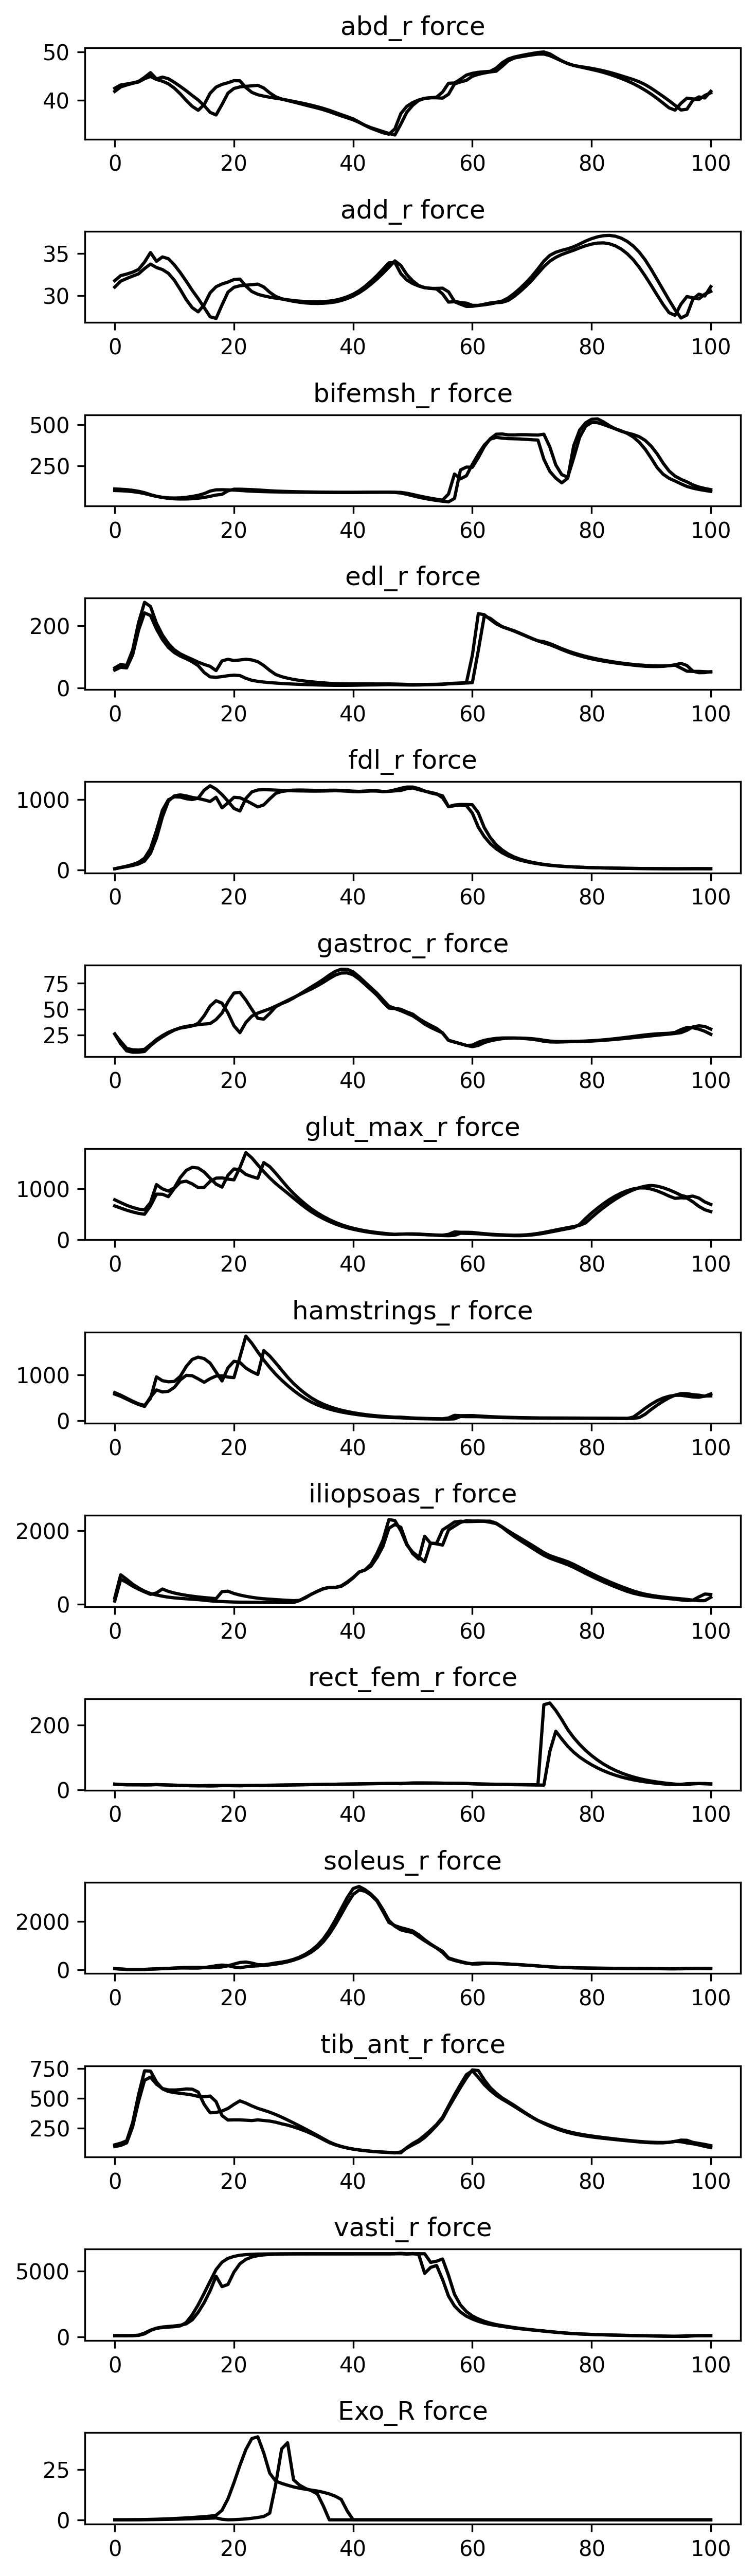

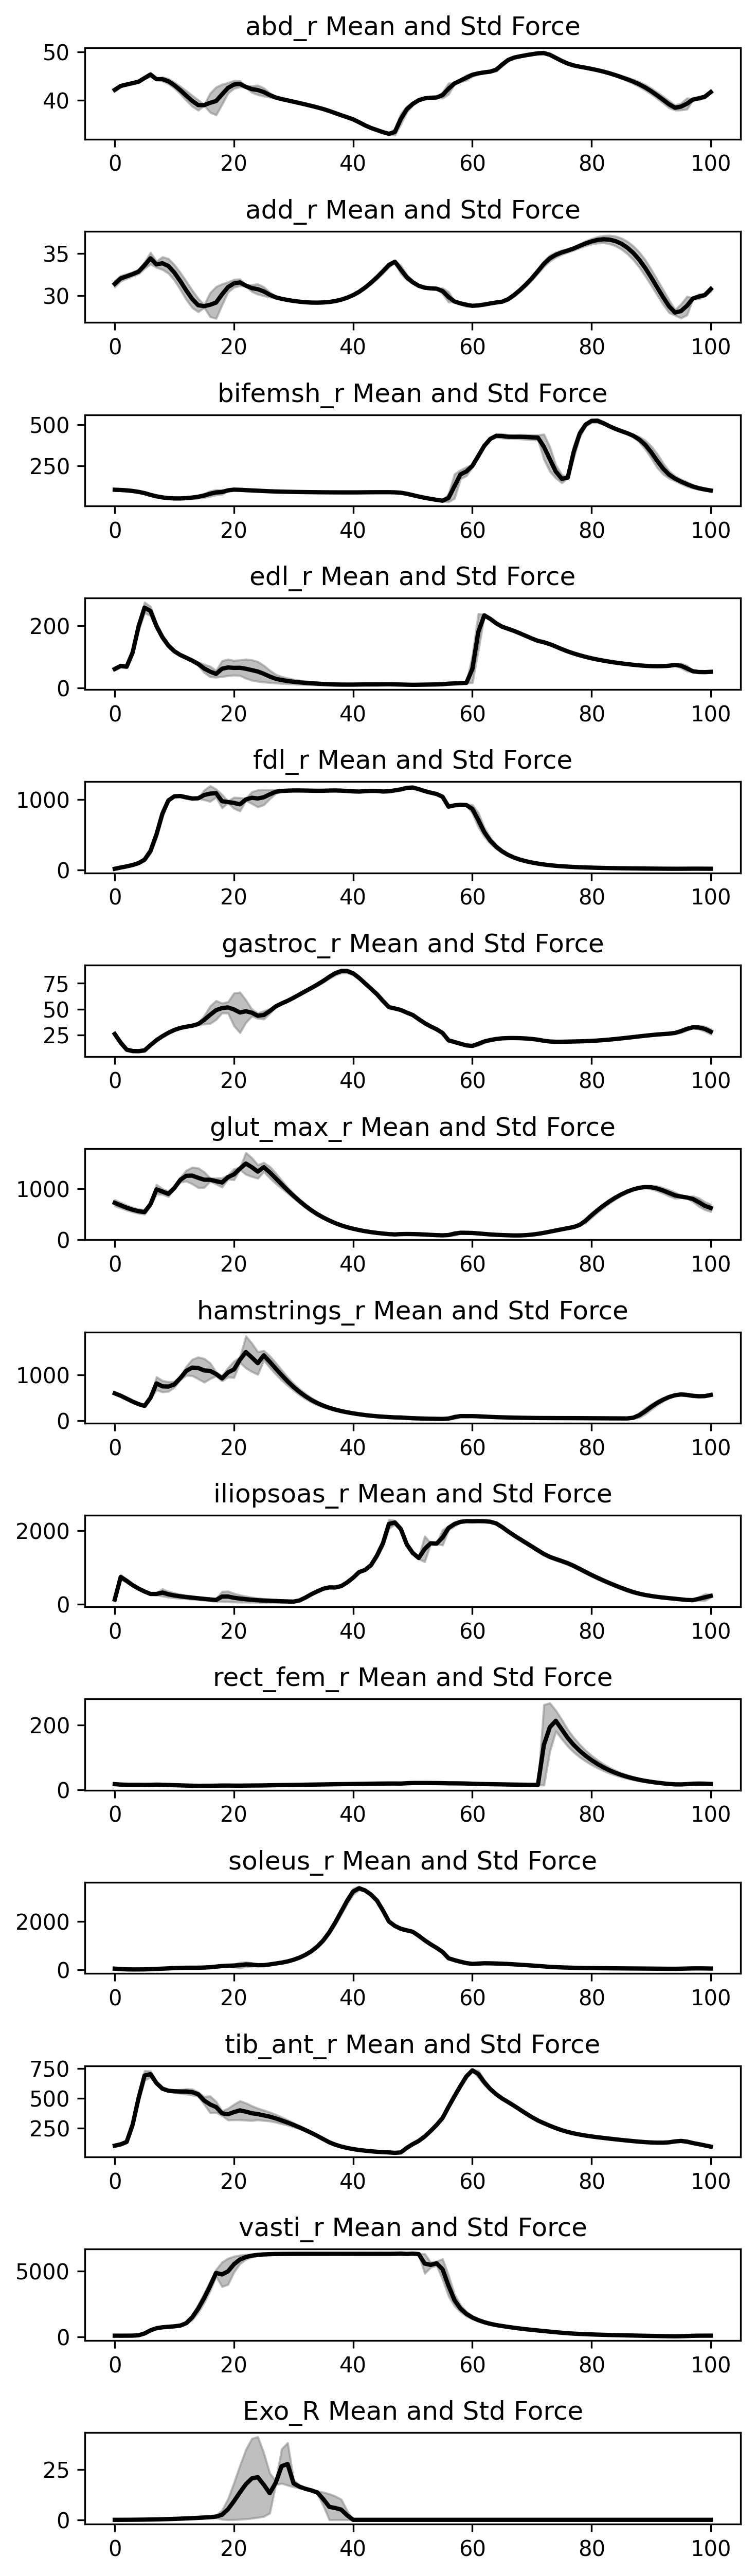

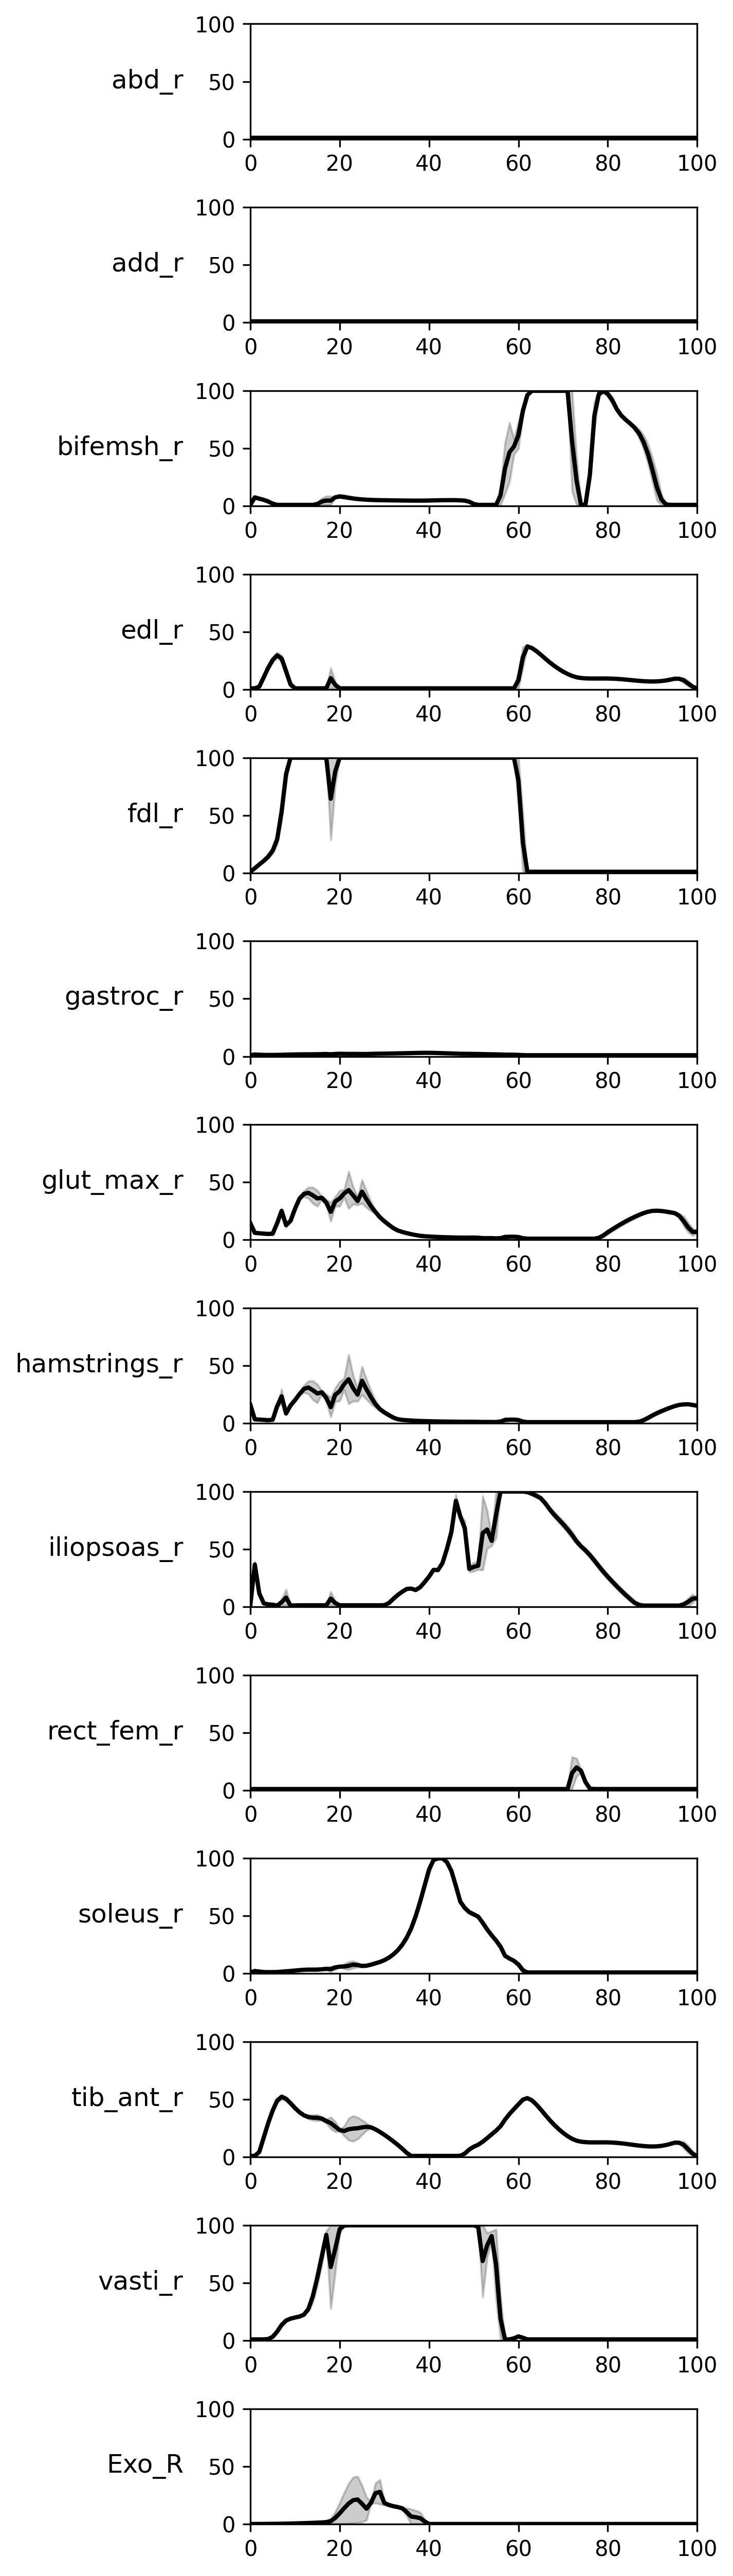

In [8]:
gait_analyzer.plot_segmented_muscle_data(result_dir=analyze_result_dir)

In [9]:
gait_evaluator.replay(gait_data_path, os.path.join(analyze_result_dir, "replay.mp4"))

d:\northeastern\neu_dev\myo_assist_dev\.venv\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.sim to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.sim` for environment variables or `env.get_wrapper_attr('sim')` that will search the reminding wrappers.
  logger.warn(
